# Project: No Show up appoinment 
> Check out the Kaggle Titanic Challenge at the following link:

> https://www.kaggle.com/joniarroba/noshowappointments/home


>Download the csv file and save it to the same location as your iPython Notebooks.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

1. What is different between show-up patients and no show_up patients?
2. Does gender have anything to do with if a person does not show up to their appointment?
3. Does where a person live affect if they show up to their appointment?
4. Does a certain age not show up more than other ages?
5. What is the trend in times for persons who show and not show?


In [70]:
#Now let's open it with pandas and set up package we will use

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [71]:
#Set up the csv file as a DataFrame
apptm = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#let's see a preview of data
apptm.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [72]:
# We could also get overall info for the dataset
apptm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [73]:
# check the null value
apptm.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [74]:
print("Rows: ", apptm.shape[0])
print('Columns: ', apptm.shape[1])

Rows:  110527
Columns:  14


### Data Cleaning

#### Data Cleaning- rename columns 

In [75]:
# Renaming columns to fix typos, inconsistency and spelling mistakes
apptm.rename(columns={'AppointmentID':'AppointmentId',
                   'Handcap':'Handicap', 
                   'Hipertension':'Hypertension'}, 
          inplace=True)

apptm.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Data Cleaning -Find and drop columns that no use
> Find and remove duplicate values in dataset

In [76]:
sum(apptm.duplicated())

0

In [77]:
apptm = apptm.drop(['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received'], axis = 1)
apptm.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No


#### Data Cleaning -Change type of values

In [78]:
#check the type
apptm.dtypes

PatientId         float64
AppointmentId       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
No-show            object
dtype: object

In [79]:
# change scheduleday and appointmentday to datetime object
apptm['ScheduledDay'] = pd.to_datetime(apptm['ScheduledDay'])
apptm['AppointmentDay'] = pd.to_datetime(apptm['AppointmentDay'])
# check
type(apptm['ScheduledDay'][0])
type(apptm['AppointmentDay'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### Data Cleaning -Replace values by numbers

In [80]:
## Replace 'M' and 'F' with 1 and 0 for 'Gender' and 'Yes' and 'No' with 1 and 0 for 'No-show'
apptm['Gender'] = apptm['Gender'].map({'M': 1, 'F': 0})
#apptm['No-show'] = apptm['No-show'].map({'Yes': 1, 'No': 0})

In [81]:
# change appoinmentday to a datetime pandas object to create a new dataframe
apptm['no_show_weekday'] = apptm['AppointmentDay'].dt.dayofweek

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What is different between show-up patients and no show_up patients?

In [104]:
show_up = apptm.loc[apptm['No-show'] == "Yes"]
len(show_up)
show_rate = len(show_up)/ len(apptm)
show_rate
no_show = apptm.loc[apptm['No-show'] == "No"]
len(no_show)
no_show_rate = len(no_show)/ len(apptm)
no_show_rate

d = {'app_status': ['No-show','show'], 'total' : [len(show_up), len(no_show)],
     'propotion': [show_rate, no_show_rate ]}
df = pd.DataFrame(data = d)
df

,app_status,total,propotion
0,No-show,22319,0.201933
1,show,88208,0.798067


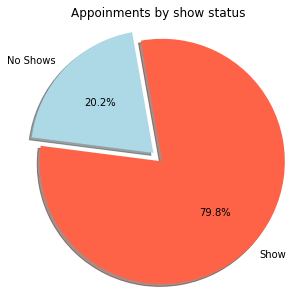

In [110]:
#data plot
labels = ['No Shows', 'Show']
sizes = [show_rate, no_show_rate]
colors = ['lightblue','tomato']
explode = (0, 0.1)
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
       autopct = '%1.1f%%', shadow = True, startangle = 100)
plt.title('Appoinments by show status')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5)

Below is the split of values in 'No-show': 0 = showed up and 1 = didnt show up: 

No     88208
Yes    22319
Name: No-show, dtype: int64

 Out of 110527 records 0 didnt show up,i.e  0


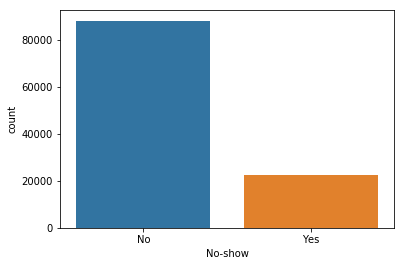

In [83]:
def no_show_class():
    no_show = 0
    for value in apptm['No-show']:
        if value == 1:
            no_show = no_show + 1
            
    print("\n Out of", len(apptm['No-show']), "records", no_show, "didnt show up,i.e ",
         round(float(no_show)))
print("Below is the split of values in 'No-show': 0 = showed up and 1 = didnt show up: \n")
print(apptm['No-show'].value_counts())
sns.countplot(x = 'No-show', data = apptm)
no_show_class()

Classes of 'No-show' are imbalanced and something we have to take into account when the dataset is going to split into train and test. A stratified shuffle split is likely going to be ideal for cross-validating our machine learning model due to its randomised validations to increase the likelihood of the imbalanced classes for cross validation.

### Research Question 2: Does gender have anything to do with if a person does not show up to their appointment?

Distribution of patients by gender: 

Female: 71619 
Male: 38599


Text(0.5, 1.0, 'Distribution of gender')

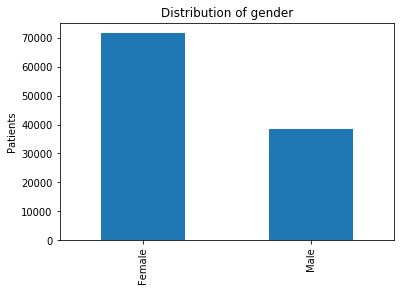

In [37]:
#let's check the gender
print("Distribution of patients by gender: \n")
print("Female: {} \nMale: {}".format(apptm['Gender'].value_counts()[0],
    apptm['Gender'].value_counts()[1]))
#plotting gender distribution
gender_bar = apptm['Gender'].value_counts().plot.bar()
gender_bar.set_xticklabels(['Female','Male'])
gender_bar.set_ylabel('Patients')
gender_bar.set_title("Distribution of gender")

There are more patients who are female than male. The difference is quite big (71619 vs 38599)

In [16]:
no_show = apptm.loc[apptm['No-show'] == 1]
no_show.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,No-show,no_show_weekday
6,7.336882e+14,5630279,0,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,1,4
7,3.449833e+12,5630575,0,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,1,4
11,7.542951e+12,5620163,1,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,1,4
17,1.479497e+13,5633460,0,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,4
20,6.222575e+14,5626083,0,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,4


Distribution of absent patients by gender: 

Female: 14594 
Male: 7725


Text(0.5, 1.0, 'Distribution of gender')

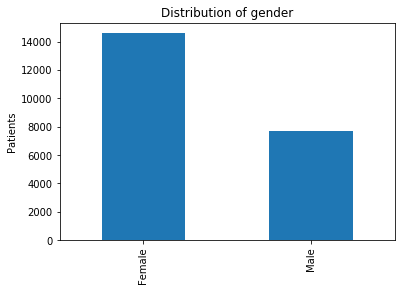

In [17]:
print("Distribution of absent patients by gender: \n")
print("Female: {} \nMale: {}".format(no_show['Gender'].value_counts()[0],
    no_show['Gender'].value_counts()[1]))
#plotting gender distribution
gender_bar = no_show['Gender'].value_counts().plot.bar()
gender_bar.set_xticklabels(['Female','Male'])
gender_bar.set_ylabel('Patients')
gender_bar.set_title("Distribution of gender")
    

In [18]:
show_up = apptm.loc[apptm['No-show'] == 0]
show_up.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,No-show,no_show_weekday
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,4
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,4
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,4
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,4
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,4


Distribution of show-up patients by gender: 

Female: 57246 
Male: 30962


Text(0.5, 1.0, 'Distribution of gender')

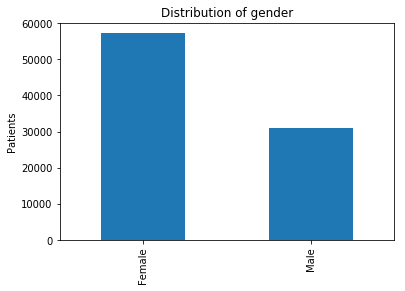

In [38]:
print("Distribution of show-up patients by gender: \n")
print("Female: {} \nMale: {}".format(show_up['Gender'].value_counts()[0],
    show_up['Gender'].value_counts()[1]))
#plotting gender distribution
gender_bar = show_up['Gender'].value_counts().plot.bar()
gender_bar.set_xticklabels(['Female','Male'])
gender_bar.set_ylabel('Patients')
gender_bar.set_title("Distribution of gender")

Text(0.5, 1.0, 'Distribution by gender')

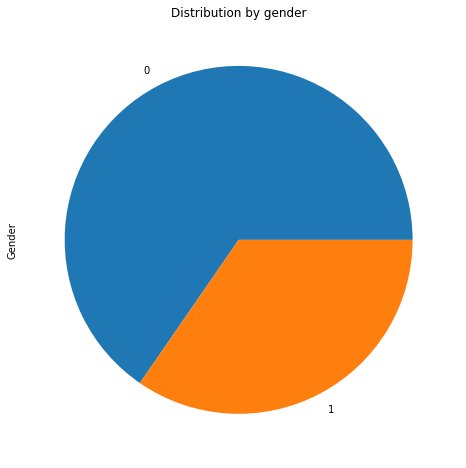

In [39]:
no_show['Gender'].value_counts().plot(kind='pie', figsize=(16, 8));
plt.title("Distribution by gender")

### Research question 3: Does where a person live affect if they show up to their appointment?

In [21]:
show_up.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,No-show,no_show_weekday
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,4
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,4
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,4
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,4
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,4


In [22]:
show_up['Neighbourhood'].value_counts().count()

80

Text(0.5, 1.0, 'neoighborhood of no_show')

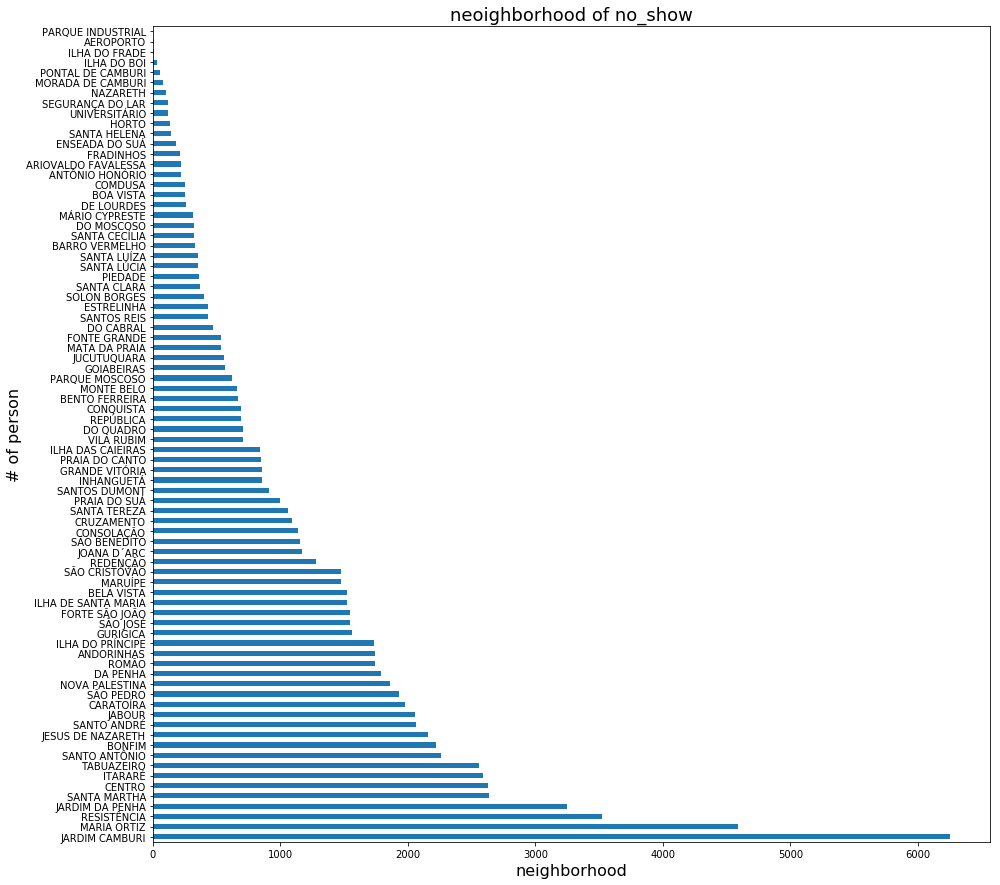

In [40]:
ax = show_up['Neighbourhood'].value_counts().plot(kind = 'barh', figsize = (15,15))
ax.set_xlabel('neighborhood', fontsize = 16)
ax.set_ylabel('# of person', fontsize = 16)
ax.set_title("neoighborhood of no_show", fontsize = 18)

### Research Question: Does a certain age not show up more than other ages?

In [29]:
# checking the range for "age":
age_range = sorted(apptm['Age'].unique())

The distribution of age varies from -1 to below 90

In [30]:
# keep record of patients between 0-90

apptm = apptm[(apptm.Age >= 0 ) & (apptm.Age <=90)]
min_age = apptm['Age'].min()
max_age = apptm['Age'].max()
print("Age now spans values from : {} to {}".format(min_age, max_age))

Age now spans values from : 0 to 90


Text(0.5, 1.0, 'Distribution of age')

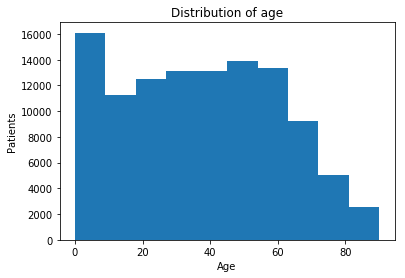

In [33]:
# take visualisation
plt.figure()
age_hist = apptm['Age'].plot.hist(bins = 10)
age_hist.set_xlabel('Age')
age_hist.set_ylabel('Patients')
age_hist.set_title('Distribution of age')

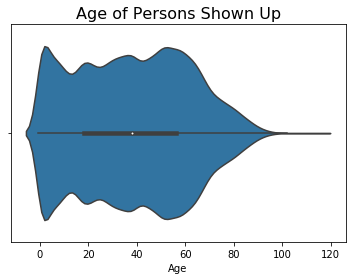

In [32]:
# show the age of persons in the dataset
ax = sns.violinplot(x=show_up['Age']);
ax.set_title('Age of Persons Shown Up',fontsize=16);

### Research question : What is the trend in times for persons who show and not show?

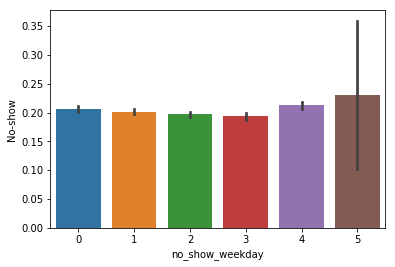

In [14]:
sns.barplot(y= 'No-show', x = 'no_show_weekday', data = apptm)

<a id='conclusions'></a>
## Conclusions


## Limitation 
 >The data set explored in this analysis was over a 6 month period. Data for a longer timeframe would provide insight into how seasonality and holidays impact show rates.

>Overlaying external data sources onto this data set such as traffic, weather, or geographic data could allow us to better understand influencers on no-show rates. Right now, the analysis is limited to general correlations.
 
 
 ## References
 
 > pie: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html
 > Pivot in pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
 > Using split in pandas: https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
 